# Données DVF : à faire
- 1) Développer un pipeline pour la récupération des données (importation à partir des données sur datagouv, webscraping)

- 2) Développer un pipeline de retraitement/nettoyage des données 

- 3) Développer un pipeline de modélisation et stocker le modèle au format pickle

- 4) Développer une application avec fastAPI/Flask + Streamlit qui restitue vos analyses à Bordeaux mais aussi sur la France entière

### 1. Scraping de la page : https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [ ]:
# Imports
import requests
import bs4
import pandas as pd

In [ ]:
# Définition de l'url
url = "https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/"

# Exécution de la requête
r = requests.get(url)

# Vérifications du bon déroulé de la requête
print(r.status_code)
#print(r.headers)
#print(r.text)

In [ ]:
# Parsing de la réponse et construction de l'arboressence
soup = bs4.BeautifulSoup(r.text, 'html.parser')

# Affichage si besoin
#print(soup)

Scraping des 4 premiers datasets de la page (2023_premier_semestre, 2022, 2021 et 2020)

In [ ]:
# Recherche de toutes les balises 'article' correspondantes aux blocs contenant les liens vers les datasets à télécharger
dataset_blocs = soup.find_all('article')

# Initialisation de la liste qui contiendra les liens vers les datasets
dataset_links = []

### Récupération du deuxième lien de chaque bloc (identifié comme celui pointant vers le téléchargement)

# Pour chaque bloc dans les 4 premiers
for dataset_bloc in dataset_blocs[:4]:
    # Listing de toutes les balises 'a' correspondantes aux liens contenus dans le bloc
    soup_dataset_links = dataset_bloc.find_all('a')
    # Récupération de l'adresse du deuxième lien
    dataset_link = soup_dataset_links[1].get("href")
    # Ajout de ce lien à la liste sauvgardée
    dataset_links.append(dataset_link)

# Affichage de la liste pour vérification
print(dataset_links)

In [ ]:
# Récupération des valeurs foncières des années 2020, 2021 et 2022, concaténation en un seul dataframe puis sauvegarde

# Liste pour stocker les dataframes temporaires
dataframes_2020_2021_2022 = []

# Boucle pour charger chaque dataset entre 2020 et 2022 et l'ajouter à la liste
for link in dataset_links[1:]:
    dataframe = pd.read_csv(link, sep='|', low_memory=False)
    dataframes_2020_2021_2022.append(dataframe)

# Fusion de tous ces dataframes en un seul
valeursfoncieres_2020_2021_2022 = pd.concat(dataframes_2020_2021_2022, ignore_index=True)

# Sauvegarde du dataframe fusionné en un fichier CSV
valeursfoncieres_2020_2021_2022.to_csv('valeursfoncieres_2020_2021_2022.csv', index=False)

In [ ]:
# Récupération des valeurs foncières du premier semestre 2023 et sauvegarde en un fichier CSV

# Chargement du dataset du premier semestre 2023
valeursfoncieres_debut_2023 = pd.read_csv(dataset_links[0], sep='|', low_memory=False)

# Sauvegarde du dataframe en un fichier CSV
valeursfoncieres_debut_2023.to_csv('valeursfoncieres_debut_2023.csv', index=False)

### 2. Traitement et nettoyage des données

Reprise ultérieure du processus (ultérieure au scraping)

In [ ]:
# Ouverture des sauvegardes (afin d'éviter de renouveler le scraping en cas de reprise ultérieure du processus)

# Imports
import pandas as pd

valeursfoncieres_2020_2021_2022 = pd.read_csv('valeursfoncieres_2020_2021_2022.csv', low_memory=False)
valeursfoncieres_debut_2023 = pd.read_csv('valeursfoncieres_debut_2023.csv', low_memory=False)

In [ ]:
data_bordeaux_2020_2021_2022 = valeursfoncieres_2020_2021_2022[(valeursfoncieres_2020_2021_2022["Commune"] == "BORDEAUX") \
                                                                & (valeursfoncieres_2020_2021_2022["Code type local"].isin([1, 2]))]

# Sauvegarde du dataframe en un fichier CSV
data_bordeaux_2020_2021_2022.to_csv('data_bordeaux_2020_2021_2022.csv', index=False)

# Aperçu du data frame
data_bordeaux_2020_2021_2022.head()

In [ ]:
data_bordeaux_debut_2023 = valeursfoncieres_debut_2023[(valeursfoncieres_debut_2023["Commune"] == "BORDEAUX") \
                                                        & (valeursfoncieres_debut_2023["Code type local"].isin([1, 2]))]

# Sauvegarde du dataframe en un fichier CSV
data_bordeaux_debut_2023.to_csv('data_bordeaux_debut_2023.csv', index=False)

# Aperçu du data frame
data_bordeaux_debut_2023.head()

Reprise ultérieure (2) du processus (ultérieure au scraping)

In [1]:
# Ouverture des sauvegardes (afin d'éviter de renouveler le filtrage sur les données de Bordeaux en cas de reprise ultérieure du processus)

# Imports
import pandas as pd

data_bordeaux_2020_2021_2022 = pd.read_csv('data_bordeaux_2020_2021_2022.csv', low_memory=False)
data_bordeaux_debut_2023 = pd.read_csv('data_bordeaux_debut_2023.csv', low_memory=False)

In [2]:
data_bordeaux_2020_2021_2022.shape

(20181, 43)

In [3]:
data_bordeaux_debut_2023.shape

(2758, 43)

### 3. Modélisation et prédiction

In [4]:
data_bordeaux = data_bordeaux_2020_2021_2022
data_bordeaux_test = data_bordeaux_debut_2023

In [5]:
data_bordeaux.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [6]:
data_bordeaux_test.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [7]:
# suppression des colonnes vides
# Liste des indices des colonnes à supprimer
#useless_cols = [0, 1, 2, 3, 4, 5, 6, 17, 18, 19, 20, 23, 37, 40, 41]

# Supprimer les colonnes spécifiées du DataFrame
#data_bordeaux = data_bordeaux.drop(data_bordeaux.columns[useless_cols], axis=1)

# Liste des noms des colonnes à supprimer
useless_col_names = ['Identifiant de document', 'Reference document', '1 Articles CGI',
                     '2 Articles CGI', '3 Articles CGI', '4 Articles CGI',
                     '5 Articles CGI', 'No disposition', 'No voie', 'Code voie',
                     'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
                     'No Volume', 'Type local', 'Identifiant local'
                     ]

# Supprimer les colonnes spécifiées du DataFrame
data_bordeaux = data_bordeaux.drop(useless_col_names, axis=1)
data_bordeaux_test = data_bordeaux_test.drop(useless_col_names, axis=1)



In [8]:
data_bordeaux.describe(include='all')

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
count,20181,20181,20155,632,20177,20181,20181.000000,20136,20181.000000,12668,...,20,33.000000,11,20181.000000,20181.000000,20181.000000,20181.000000,7325,118,7325.000000
unique,798,6,6136,7,20,1511,NaN,339,NaN,969,...,15,NaN,6,NaN,NaN,NaN,NaN,4,3,NaN
top,21/01/2021,Vente,"10515000,00",B,RUE,GODARD,NaN,HE,NaN,2,...,"25,60",NaN,"6,00",NaN,NaN,NaN,NaN,S,IMM,NaN
freq,238,20035,206,533,15344,234,NaN,305,NaN,780,...,6,NaN,6,NaN,NaN,NaN,NaN,7112,96,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,33222.209008,NaN,127.089094,NaN,...,NaN,12.424242,NaN,0.764927,1.777266,68.920718,2.851098,NaN,NaN,289.744300
std,NaN,NaN,NaN,NaN,NaN,NaN,285.696853,NaN,97.141666,NaN,...,NaN,15.843039,NaN,0.742949,0.416092,44.866977,1.509920,NaN,NaN,566.861607
min,NaN,NaN,NaN,NaN,NaN,NaN,33000.000000,NaN,1.000000,NaN,...,NaN,3.000000,NaN,0.000000,1.000000,6.000000,0.000000,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,33000.000000,NaN,52.000000,NaN,...,NaN,7.000000,NaN,0.000000,2.000000,39.000000,2.000000,NaN,NaN,110.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,33100.000000,NaN,106.000000,NaN,...,NaN,8.000000,NaN,1.000000,2.000000,60.000000,3.000000,NaN,NaN,173.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,33300.000000,NaN,182.000000,NaN,...,NaN,9.000000,NaN,1.000000,2.000000,84.000000,4.000000,NaN,NaN,286.000000


In [ ]:
#data_bordeaux['No disposition'].unique()

In [9]:
data_bordeaux['Nature mutation'].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Adjudication',
       'Echange', 'Vente terrain à bâtir', 'Expropriation'], dtype=object)

In [10]:
data_bordeaux['B/T/Q'].unique()

array([nan, 'T', 'B', 'A', 'S', 'C', 'Q', 'G'], dtype=object)

In [11]:
data_bordeaux.dtypes

Date mutation                  object
Nature mutation                object
Valeur fonciere                object
B/T/Q                          object
Type de voie                   object
Voie                           object
Code postal                   float64
Section                        object
No plan                         int64
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot                      float64
Surface Carrez du 2eme lot     object
3eme lot                      float64
Surface Carrez du 3eme lot     object
4eme lot                      float64
Surface Carrez du 4eme lot     object
5eme lot                      float64
Surface Carrez du 5eme lot     object
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terrain               float64
dtype: objec

In [12]:
data_bordeaux['Valeur fonciere'] = data_bordeaux['Valeur fonciere'].str.replace(',', '.')
data_bordeaux['Valeur fonciere'] = pd.to_numeric(data_bordeaux['Valeur fonciere'], errors='coerce')
data_bordeaux['Valeur fonciere'] = data_bordeaux['Valeur fonciere'].fillna(0).astype(int)

data_bordeaux_test['Valeur fonciere'] = data_bordeaux_test['Valeur fonciere'].str.replace(',', '.')
data_bordeaux_test['Valeur fonciere'] = pd.to_numeric(data_bordeaux_test['Valeur fonciere'], errors='coerce')
data_bordeaux_test['Valeur fonciere'] = data_bordeaux_test['Valeur fonciere'].fillna(0).astype(int)

In [13]:
data_bordeaux['Code postal'] = data_bordeaux['Code postal'].astype(int)
data_bordeaux_test['Code postal'] = data_bordeaux_test['Code postal'].astype(int)

In [14]:
data_bordeaux.dtypes

Date mutation                  object
Nature mutation                object
Valeur fonciere                 int32
B/T/Q                          object
Type de voie                   object
Voie                           object
Code postal                     int32
Section                        object
No plan                         int64
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot                      float64
Surface Carrez du 2eme lot     object
3eme lot                      float64
Surface Carrez du 3eme lot     object
4eme lot                      float64
Surface Carrez du 4eme lot     object
5eme lot                      float64
Surface Carrez du 5eme lot     object
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terrain               float64
dtype: objec

In [15]:
data_bordeaux.shape

(20181, 26)

In [16]:
data_bordeaux.duplicated().value_counts()

False    19150
True      1031
Name: count, dtype: int64

In [17]:
data_bordeaux = data_bordeaux.drop_duplicates()

In [18]:
data_bordeaux.duplicated().value_counts()

False    19150
Name: count, dtype: int64

## Variable cible

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
target_stats = data_bordeaux['Valeur fonciere'].describe()
print(target_stats)

count      19150.000
mean      483816.880
std       757756.685
min            0.000
25%       196000.000
50%       303200.000
75%       525000.000
max     21407840.000
Name: Valeur fonciere, dtype: float64


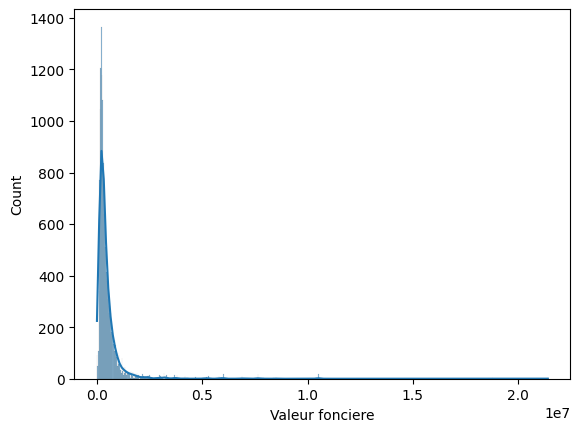

In [20]:
# Exemple en utilisant seaborn pour un histogramme
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_bordeaux['Valeur fonciere'], kde=True)
plt.show()

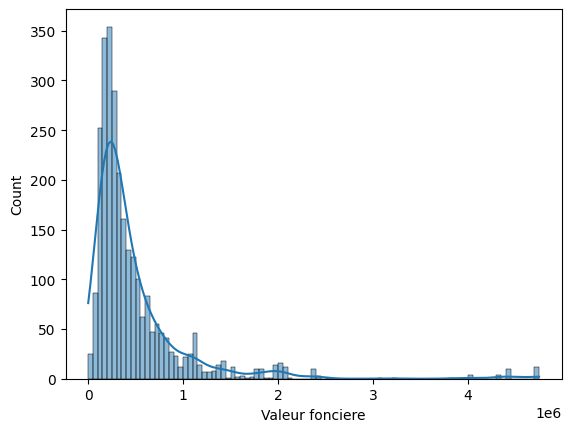

In [21]:
# Exemple en utilisant seaborn pour un histogramme

sns.histplot(data_bordeaux_test['Valeur fonciere'], kde=True)
plt.show()

In [22]:
median_value = data_bordeaux['Valeur fonciere'].median()
median_value

303200.0

In [23]:
Q1 = data_bordeaux['Valeur fonciere'].quantile(0.25)
Q3 = data_bordeaux['Valeur fonciere'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

filtered_data = data_bordeaux[(data_bordeaux['Valeur fonciere'] >= lower_limit) & (data_bordeaux['Valeur fonciere'] <= upper_limit)]

print(filtered_data['Valeur fonciere'].describe())

count     17719.000
mean     345905.520
std      212190.864
min           0.000
25%      189923.500
50%      283000.000
75%      456175.000
max     1017950.000
Name: Valeur fonciere, dtype: float64


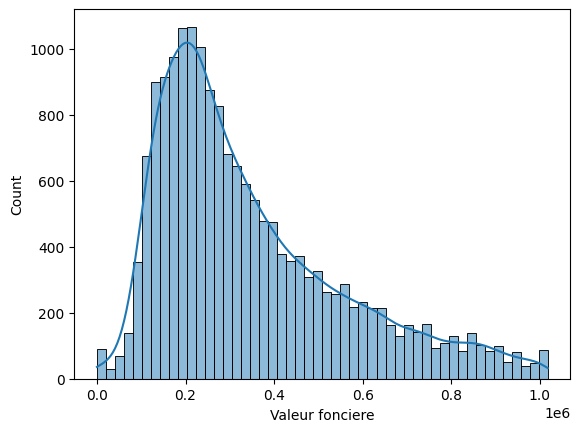

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(filtered_data['Valeur fonciere'], kde=True)
plt.show()

## Conversion des colonnes de type 'object'

In [25]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Supposons que votre DataFrame 'filtered_data' est déjà chargé et contient une colonne 'Date mutation' et 'Nature mutation'

# Convertir la colonne 'Date mutation' en nombre (timestamp)
filtered_data['Date mutation'] = pd.to_datetime(filtered_data['Date mutation'], format='%d/%m/%Y').astype('int64')
data_bordeaux_test['Date mutation'] = pd.to_datetime(data_bordeaux_test['Date mutation'], format='%d/%m/%Y').astype('int64')

# Copier les données en numérique pour la matrice de corrélation
filtered_data_numeric = filtered_data.copy()

# Initialisation de l'encodeur de labels
label_encoder = LabelEncoder()

# Boucle pour encoder toutes les colonnes de type 'object'
for column in filtered_data_numeric.columns:
    if filtered_data_numeric[column].dtype == 'object':
        # Adapter l'encodeur et transformer les données pour chaque colonne texte
        filtered_data_numeric[column] = label_encoder.fit_transform(filtered_data_numeric[column])

C:\Users\zara\AppData\Local\Temp\ipykernel_13300\3992339958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date mutation'] = pd.to_datetime(filtered_data['Date mutation'], format='%d/%m/%Y').astype('int64')


## variable explicative

In [26]:
# Correlation matrix
#corr_matrix = filtered_data.corr().round(2)
corr_matrix = filtered_data_numeric.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

In [27]:
filtered_data.columns

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
       'Type de voie', 'Voie', 'Code postal', 'Section', 'No plan', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

## suite data cleaning

In [28]:
filtered_data.shape

(17719, 26)

In [29]:
filtered_data.describe(include='all')

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
count,17719.000,17719,17719.000,576,17715,17719,17719.000,17676,17719.000,12396,...,16,23.000,6,17719.000,17719.000,17719.000,17719.000,5336,13,5336.000
unique,NaN,6,NaN,7,20,1493,NaN,339,NaN,967,...,13,NaN,3,NaN,NaN,NaN,NaN,4,1,NaN
top,NaN,Vente,NaN,B,RUE,SAINT LOUIS,NaN,HE,NaN,2,...,"25,60",NaN,"6,00",NaN,NaN,NaN,NaN,S,POTAG,NaN
freq,NaN,17582,NaN,495,13580,186,NaN,271,NaN,756,...,4,NaN,4,NaN,NaN,NaN,NaN,5272,13,NaN
mean,1627327894170099968.000,NaN,345905.520,NaN,NaN,NaN,33227.897,NaN,125.286,NaN,...,NaN,12.739,NaN,0.848,1.774,66.054,2.798,NaN,NaN,208.867
std,26363009765688252.000,NaN,212190.864,NaN,NaN,NaN,288.433,NaN,97.646,NaN,...,NaN,18.081,NaN,0.717,0.418,37.610,1.403,NaN,NaN,393.191
min,1577923200000000000.000,NaN,0.000,NaN,NaN,NaN,33000.000,NaN,1.000,NaN,...,NaN,3.000,NaN,0.000,1.000,6.000,0.000,NaN,NaN,12.000
25%,1604880000000000000.000,NaN,189923.500,NaN,NaN,NaN,33000.000,NaN,51.000,NaN,...,NaN,6.500,NaN,0.000,2.000,40.000,2.000,NaN,NaN,101.000
50%,1627603200000000000.000,NaN,283000.000,NaN,NaN,NaN,33100.000,NaN,103.000,NaN,...,NaN,8.000,NaN,1.000,2.000,60.000,3.000,NaN,NaN,152.000
75%,1650412800000000000.000,NaN,456175.000,NaN,NaN,NaN,33300.000,NaN,178.000,NaN,...,NaN,9.000,NaN,1.000,2.000,83.000,4.000,NaN,NaN,236.000


In [ ]:
# filtered_data.columns

In [ ]:
# # suppression des colonnes vides
# # Liste des indices des colonnes à supprimer
# useless_cols = [0, 1, 4, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20 ,21, 24]

# # Supprimer les colonnes spécifiées du DataFrame
# filtered_data_2 = filtered_data.drop(filtered_data.columns[useless_cols], axis=1)

In [ ]:
# filtered_data_2.describe(include='all')

In [30]:
filtered_data_2 = filtered_data

In [ ]:
# # Correlation matrix
# corr_matrix = filtered_data_2.corr().round(2)

# import plotly.figure_factory as ff

# fig = ff.create_annotated_heatmap(corr_matrix.values,
#                                   x = corr_matrix.columns.tolist(),
#                                   y = corr_matrix.index.tolist())


# fig.show()

In [31]:
filtered_data_2.shape

(17719, 26)

In [ ]:
# filtered_data_2.dtypes

In [32]:
filtered_data_2.describe(include="all")

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
count,17719.000,17719,17719.000,576,17715,17719,17719.000,17676,17719.000,12396,...,16,23.000,6,17719.000,17719.000,17719.000,17719.000,5336,13,5336.000
unique,NaN,6,NaN,7,20,1493,NaN,339,NaN,967,...,13,NaN,3,NaN,NaN,NaN,NaN,4,1,NaN
top,NaN,Vente,NaN,B,RUE,SAINT LOUIS,NaN,HE,NaN,2,...,"25,60",NaN,"6,00",NaN,NaN,NaN,NaN,S,POTAG,NaN
freq,NaN,17582,NaN,495,13580,186,NaN,271,NaN,756,...,4,NaN,4,NaN,NaN,NaN,NaN,5272,13,NaN
mean,1627327894170099968.000,NaN,345905.520,NaN,NaN,NaN,33227.897,NaN,125.286,NaN,...,NaN,12.739,NaN,0.848,1.774,66.054,2.798,NaN,NaN,208.867
std,26363009765688252.000,NaN,212190.864,NaN,NaN,NaN,288.433,NaN,97.646,NaN,...,NaN,18.081,NaN,0.717,0.418,37.610,1.403,NaN,NaN,393.191
min,1577923200000000000.000,NaN,0.000,NaN,NaN,NaN,33000.000,NaN,1.000,NaN,...,NaN,3.000,NaN,0.000,1.000,6.000,0.000,NaN,NaN,12.000
25%,1604880000000000000.000,NaN,189923.500,NaN,NaN,NaN,33000.000,NaN,51.000,NaN,...,NaN,6.500,NaN,0.000,2.000,40.000,2.000,NaN,NaN,101.000
50%,1627603200000000000.000,NaN,283000.000,NaN,NaN,NaN,33100.000,NaN,103.000,NaN,...,NaN,8.000,NaN,1.000,2.000,60.000,3.000,NaN,NaN,152.000
75%,1650412800000000000.000,NaN,456175.000,NaN,NaN,NaN,33300.000,NaN,178.000,NaN,...,NaN,9.000,NaN,1.000,2.000,83.000,4.000,NaN,NaN,236.000


In [33]:
filtered_data_2.columns

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
       'Type de voie', 'Voie', 'Code postal', 'Section', 'No plan', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Surface reelle bati',
       'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [34]:
filtered_data_2_columns = ['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
                           'Type de voie', 'Voie', 'Code postal', 'Section', 'No plan', '1er lot',
                           'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
                           '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
                           'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
                           'Nombre de lots', 'Code type local', 'Surface reelle bati',
                           'Nombre pieces principales', 'Nature culture',
                           'Nature culture speciale', 'Surface terrain']

In [ ]:
# # On enlève le nombre de pièce parce qu'il est trop corréler à "surface réelle" (à hauteur de 0.86)
# useless_cols = [10]

# # Supprimer les colonnes spécifiées du DataFrame
# filtered_data_2 = filtered_data_2.drop(filtered_data_2.columns[useless_cols], axis=1)

# Pipeline preprocessing

In [35]:
filtered_data_2.head()

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1641254400000000000,Vente,396000,NaN,RUE,DE NAVARRE,33000,HB,203,NaN,...,NaN,NaN,NaN,0,1.000,71.000,4.000,S,NaN,70.000
1,1641340800000000000,Vente,158500,NaN,RUE,DU SOLEIL,33000,HE,381,9,...,NaN,NaN,NaN,1,2.000,40.000,1.000,NaN,NaN,NaN
2,1641513600000000000,Vente,187000,NaN,RUE,STEHELIN CAUD,33200,VX,97,5,...,NaN,NaN,NaN,1,2.000,35.000,1.000,NaN,NaN,NaN
3,1641168000000000000,Vente,312500,NaN,RUE,POUDENSAN,33000,LE,169,NaN,...,NaN,NaN,NaN,0,1.000,65.000,3.000,S,NaN,45.000
4,1641340800000000000,Vente,116000,NaN,RUE,LEYTEIRE,33000,DR,113,13,...,NaN,NaN,NaN,1,2.000,20.000,1.000,NaN,NaN,NaN


In [36]:
filtered_data_2.describe(include='all')

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
count,17719.000,17719,17719.000,576,17715,17719,17719.000,17676,17719.000,12396,...,16,23.000,6,17719.000,17719.000,17719.000,17719.000,5336,13,5336.000
unique,NaN,6,NaN,7,20,1493,NaN,339,NaN,967,...,13,NaN,3,NaN,NaN,NaN,NaN,4,1,NaN
top,NaN,Vente,NaN,B,RUE,SAINT LOUIS,NaN,HE,NaN,2,...,"25,60",NaN,"6,00",NaN,NaN,NaN,NaN,S,POTAG,NaN
freq,NaN,17582,NaN,495,13580,186,NaN,271,NaN,756,...,4,NaN,4,NaN,NaN,NaN,NaN,5272,13,NaN
mean,1627327894170099968.000,NaN,345905.520,NaN,NaN,NaN,33227.897,NaN,125.286,NaN,...,NaN,12.739,NaN,0.848,1.774,66.054,2.798,NaN,NaN,208.867
std,26363009765688252.000,NaN,212190.864,NaN,NaN,NaN,288.433,NaN,97.646,NaN,...,NaN,18.081,NaN,0.717,0.418,37.610,1.403,NaN,NaN,393.191
min,1577923200000000000.000,NaN,0.000,NaN,NaN,NaN,33000.000,NaN,1.000,NaN,...,NaN,3.000,NaN,0.000,1.000,6.000,0.000,NaN,NaN,12.000
25%,1604880000000000000.000,NaN,189923.500,NaN,NaN,NaN,33000.000,NaN,51.000,NaN,...,NaN,6.500,NaN,0.000,2.000,40.000,2.000,NaN,NaN,101.000
50%,1627603200000000000.000,NaN,283000.000,NaN,NaN,NaN,33100.000,NaN,103.000,NaN,...,NaN,8.000,NaN,1.000,2.000,60.000,3.000,NaN,NaN,152.000
75%,1650412800000000000.000,NaN,456175.000,NaN,NaN,NaN,33300.000,NaN,178.000,NaN,...,NaN,9.000,NaN,1.000,2.000,83.000,4.000,NaN,NaN,236.000


In [37]:
import tensorflow as tf

In [ ]:
# numeric_features = ['Surface reelle bati', 'Nombre de lots', 'No plan']
# categorical_features = ['Nature mutation', 'Type de voie', 'Voie', 'Code postal', 'Code type local', 'B/T/Q', 'Surface terrain']

In [38]:
numeric_features = filtered_data_2.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Valeur fonciere')
numeric_features

['Date mutation',
 'Code postal',
 'No plan',
 '2eme lot',
 '3eme lot',
 '4eme lot',
 '5eme lot',
 'Nombre de lots',
 'Code type local',
 'Surface reelle bati',
 'Nombre pieces principales',
 'Surface terrain']

In [39]:
categorical_features = filtered_data_2.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Nature mutation',
 'B/T/Q',
 'Type de voie',
 'Voie',
 'Section',
 '1er lot',
 'Surface Carrez du 1er lot',
 'Surface Carrez du 2eme lot',
 'Surface Carrez du 3eme lot',
 'Surface Carrez du 4eme lot',
 'Surface Carrez du 5eme lot',
 'Nature culture',
 'Nature culture speciale']

## data 2023 de test

In [ ]:
# #dataset = pd.read_csv("data_bordeaux_2023.csv", low_memory=False)
# dataset = pd.read_csv("data_bordeaux_debut_2023.csv", low_memory=False)
# data_2023 = dataset[(dataset["Commune"] == "BORDEAUX") & (dataset["Code type local"].isin([1, 2]))]

In [40]:
data_2023 = data_bordeaux_test

In [41]:
print(data_2023.shape)
data_2023.head()

(2758, 26)


,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1672876800000000000,Vente,420000,NaN,RUE,DE LESCURE,33000,IW,155,NaN,...,NaN,NaN,NaN,0,1.000,80.000,3.000,S,NaN,211.000
1,1672790400000000000,Vente,134260,NaN,RUE,NERIGEAN,33800,DN,342,2.000,...,NaN,NaN,NaN,1,2.000,25.000,2.000,NaN,NaN,NaN
2,1672790400000000000,Vente,360000,NaN,IMP,LUCKNER,33000,PO,167,3.000,...,NaN,NaN,NaN,1,2.000,65.000,2.000,NaN,NaN,NaN
3,1672876800000000000,Vente,249900,NaN,RUE,8 EME REGIMENT INFANTERIE,33200,YP,44,31.000,...,NaN,NaN,NaN,2,1.000,64.000,3.000,NaN,NaN,NaN
4,1672704000000000000,Vente,497000,NaN,RUE,JUDAIQUE,33000,KX,97,4.000,...,NaN,NaN,NaN,1,2.000,90.000,4.000,NaN,NaN,NaN


## Data train & TEST

In [ ]:
# filtered_data_2[categorical_features] = filtered_data_2[categorical_features].astype(str)
# columns_to_convert = ['B/T/Q', 'Surface terrain']
# filtered_data_2[columns_to_convert] = filtered_data_2[columns_to_convert].astype(str)
# filtered_data_2[columns_to_convert] = filtered_data_2[columns_to_convert].fillna('aucun')

In [42]:
filtered_data_2[categorical_features] = filtered_data_2[categorical_features].astype(str)
filtered_data_2[categorical_features] = filtered_data_2[categorical_features].fillna('aucun')

In [43]:
data_2023[categorical_features] = data_2023[categorical_features].astype(str)
data_2023[categorical_features] = data_2023[categorical_features].fillna('aucun')

In [44]:
filtered_data_2.describe(include='all')

,Date mutation,Nature mutation,Valeur fonciere,B/T/Q,Type de voie,Voie,Code postal,Section,No plan,1er lot,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
count,17719.000,17719,17719.000,17719,17719,17719,17719.000,17719,17719.000,17719,...,17719,23.000,17719,17719.000,17719.000,17719.000,17719.000,17719,17719,5336.000
unique,NaN,6,NaN,8,21,1493,NaN,340,NaN,968,...,14,NaN,4,NaN,NaN,NaN,NaN,5,2,NaN
top,NaN,Vente,NaN,nan,RUE,SAINT LOUIS,NaN,HE,NaN,nan,...,nan,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,NaN
freq,NaN,17582,NaN,17143,13580,186,NaN,271,NaN,5323,...,17703,NaN,17713,NaN,NaN,NaN,NaN,12383,17706,NaN
mean,1627327894170099968.000,NaN,345905.520,NaN,NaN,NaN,33227.897,NaN,125.286,NaN,...,NaN,12.739,NaN,0.848,1.774,66.054,2.798,NaN,NaN,208.867
std,26363009765688252.000,NaN,212190.864,NaN,NaN,NaN,288.433,NaN,97.646,NaN,...,NaN,18.081,NaN,0.717,0.418,37.610,1.403,NaN,NaN,393.191
min,1577923200000000000.000,NaN,0.000,NaN,NaN,NaN,33000.000,NaN,1.000,NaN,...,NaN,3.000,NaN,0.000,1.000,6.000,0.000,NaN,NaN,12.000
25%,1604880000000000000.000,NaN,189923.500,NaN,NaN,NaN,33000.000,NaN,51.000,NaN,...,NaN,6.500,NaN,0.000,2.000,40.000,2.000,NaN,NaN,101.000
50%,1627603200000000000.000,NaN,283000.000,NaN,NaN,NaN,33100.000,NaN,103.000,NaN,...,NaN,8.000,NaN,1.000,2.000,60.000,3.000,NaN,NaN,152.000
75%,1650412800000000000.000,NaN,456175.000,NaN,NaN,NaN,33300.000,NaN,178.000,NaN,...,NaN,9.000,NaN,1.000,2.000,83.000,4.000,NaN,NaN,236.000


In [45]:
# Select Target and features
target_name = 'Valeur fonciere'
#features_names = ['Nature mutation', 'B/T/Q', 'Type de voie', 'Voie', 'No plan', 'Code postal', 'Nombre de lots', 'Code type local', 'Surface reelle bati', 'Surface terrain']
features_names = numeric_features + categorical_features

print("Separating labels from features...")
Y = filtered_data_2.loc[:,target_name]
X = filtered_data_2.loc[:, features_names]

Separating labels from features...


In [46]:
print(Y.head())
print()
print(X.head())
print()

0    396000
1    158500
2    187000
3    312500
4    116000
Name: Valeur fonciere, dtype: int32

         Date mutation  Code postal  No plan  2eme lot  3eme lot  4eme lot   
0  1641254400000000000        33000      203       NaN       NaN       NaN  \
1  1641340800000000000        33000      381       NaN       NaN       NaN   
2  1641513600000000000        33200       97       NaN       NaN       NaN   
3  1641168000000000000        33000      169       NaN       NaN       NaN   
4  1641340800000000000        33000      113       NaN       NaN       NaN   

   5eme lot  Nombre de lots  Code type local  Surface reelle bati  ...   
0       NaN               0            1.000               71.000  ...  \
1       NaN               1            2.000               40.000  ...   
2       NaN               1            2.000               35.000  ...   
3       NaN               0            1.000               65.000  ...   
4       NaN               1            2.000               20.00

## Split, Pipeline & Creation batch

In [47]:
from sklearn.model_selection import train_test_split
# split train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# split test set
# No need here we got Y_test and X_test on

In [48]:
Y_test = data_2023.loc[:,target_name]
X_test = data_2023.loc[:, features_names]
print("...Done.")

...Done.


In [49]:
print(Y_test.head())
print()
print(X_test.head())
print()

0    420000
1    134260
2    360000
3    249900
4    497000
Name: Valeur fonciere, dtype: int32

         Date mutation  Code postal  No plan  2eme lot  3eme lot  4eme lot   
0  1672876800000000000        33000      155       NaN       NaN       NaN  \
1  1672790400000000000        33800      342       NaN       NaN       NaN   
2  1672790400000000000        33000      167       NaN       NaN       NaN   
3  1672876800000000000        33200       44    32.000       NaN       NaN   
4  1672704000000000000        33000       97       NaN       NaN       NaN   

   5eme lot  Nombre de lots  Code type local  Surface reelle bati  ...   
0       NaN               0            1.000               80.000  ...  \
1       NaN               1            2.000               25.000  ...   
2       NaN               1            2.000               65.000  ...   
3       NaN               2            1.000               64.000  ...   
4       NaN               1            2.000               90.00

In [50]:
print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_val", X_val.shape, "y_val", y_val.shape)
print("X_test", X_test.shape, "y_test", Y_test.shape)

X_train (14175, 25) y_train (14175,)
X_val (3544, 25) y_val (3544,)
X_test (2758, 25) y_test (2758,)


In [ ]:
# X_train.type()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# # changement type de données
# # parce que dans le jeux de données 2023 les données n'ont pas le bons types (possède des virgules)
# # Change Y in integer
# Y = Y.astype(int)
# Y_test = Y_test.str.replace(',', '.')
# Y_test.fillna('0', inplace=True)
# Y_test = Y_test.astype(float).astype(int)

In [ ]:
# numeric_features = ['Nombre de lots', 'Surface reelle bati', 'No plan', 'Surface terrain', 'Code type local']
# categorical_features = ['Nature mutation', 'Type de voie', 'Voie', 'Code postal', 'B/T/Q']

In [52]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [53]:
from scipy.sparse import hstack
# Preprocessings on train set

print("Performing preprocessings on features set...")
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_train[0:5])
print()
print(X_val[0:5])
print()
print(X_test[0:5])

Performing preprocessings on features set...


c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning:

Found unknown categories in columns [1, 3, 5, 6, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros

c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning:

Found unknown categories in columns [2, 3, 4, 5, 6, 7, 8] during transform. These unknown categories will be encoded as all zeros



...Done.
[[-1.64978545 -0.0957305  -0.28382217 ...  0.          1.
   1.        ]
 [ 1.16704258 -0.78771408  1.32889952 ...  0.          1.
   1.        ]
 [ 1.33062145 -0.0957305   0.32860379 ...  1.          0.
   1.        ]
 [ 0.26408726 -0.44172229 -0.38589316 ...  0.          1.
   1.        ]
 [-1.43058977 -0.78771408 -0.11030148 ...  0.          1.
   1.        ]]

[[-0.52763444 -0.78771408 -0.10009438 ...  0.          1.
   1.        ]
 [-0.7206575  -0.0957305  -1.21266821 ...  0.          1.
   1.        ]
 [ 0.26408726 -0.44172229  0.78792326 ...  1.          0.
   1.        ]
 [-0.17757567 -0.78771408 -0.52879255 ...  1.          0.
   1.        ]
 [-1.06744469 -0.78771408 -0.35527186 ...  0.          1.
   1.        ]]

[[ 1.72648229 -0.78771408  0.29798249 ...  1.          0.
   1.        ]
 [ 1.72321072  1.98022025  2.20671007 ...  0.          1.
   1.        ]
 [ 1.72321072 -0.78771408  0.42046768 ...  0.          1.
   1.        ]
 [ 1.72648229 -0.0957305  -0.83500553 

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)

# y_val = scaler.transform(y_val)
# Y_test = scaler.transform(Y_test.values.reshape(-1, 1))

In [54]:
# Convertir les matrices creuses en tableaux denses

train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test = tf.data.Dataset.from_tensor_slices((X_test,Y_test))

# print("train:",train)
# print("val:", val)
# print("test:", test)

Shuffle sert à mélanger l'ordre des exemples données au modèle, cela permet de changer les séquences. Le batch permet de diviser le dataset en petits lots, le modèle ajuste les poids après chaque lots ici de 128 échantillons (pour éviter l'ajustement individuel).

In [55]:
# shuffle and creation batch of 128
train_batch = train.shuffle(len(X_train)).batch(128)
val_batch = val.shuffle(len(X_val)).batch(128)
test_batch = test.shuffle(len(X_test)).batch(128)

print("train batch:", next(iter(train_batch)))
print("val batch:", next(iter(val_batch)))
print("test batch:", next(iter(test_batch)))

train batch: (<tf.Tensor: shape=(128, 6580), dtype=float64, numpy=
array([[ 0.69593546,  1.98022025, -0.28382217, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.32624722, -0.78771408, -0.80438423, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.17248309, -0.78771408, -0.39610026, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.73846596, -0.78771408,  0.51233158, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.6250634 , -0.0957305 ,  0.71647357, ...,  0.        ,
         1.        ,  1.        ],
       [-0.89077952, -0.44172229, -0.55941385, ...,  0.        ,
         1.        ,  1.        ]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([192000, 555000, 213000, 344476, 600000, 311230, 812800, 185000,
       130000, 279850, 486500,  49190, 222950, 617650, 615000, 598000,
       551600, 265000, 330000, 285000, 762140, 212500, 375000, 356010,
       850000, 248900, 424950, 103000,      1, 255000, 4184

# Model

In [56]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanSquaredError

### best model for now

In [ ]:
!pip install -U tensorboard

In [57]:
from tensorflow.keras import regularizers

In [58]:
print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_val", X_val.shape, "y_val", y_val.shape)
print("X_test", X_test.shape, "y_test", Y_test.shape)

X_train (14175, 6580) y_train (14175,)
X_val (3544, 6580) y_val (3544,)
X_test (2758, 6580) y_test (2758,)


In [59]:
input_shape = 6580

In [60]:
#second train
premier_model = Sequential([
    Dense(128, "relu", input_shape=(input_shape,), kernel_regularizer=regularizers.l2(0.01)), #input nombre de colonnes
    BatchNormalization(), # pour  stabiliser l'entrainment en normalisant les activations (ça accélère la convergence)
    Dense(128,"relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4), # couche pour éviter le surajustement, il drop 40% des neurones à chaque fois
    Dense(64, "relu", kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, "linear") # on met un seul neurone en sortie, c'est le neurone de prédiction du prix.
    ])

premier_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               842368    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                       

In [61]:
premier_model.compile(optimizer=Adam(), #adam à un learning rate par défaut à 0.001 mais il adapte tout seul le pas
              loss=MeanSquaredError(), # loss fonction  MSE
              metrics=['mae']) # mean absolute error

In [62]:
print("Forme de X_train:", X_train.shape)
print("Forme de X_val:", X_val.shape)
print("Forme de X_test:", X_test.shape)


Forme de X_train: (14175, 6580)
Forme de X_val: (3544, 6580)
Forme de X_test: (2758, 6580)


In [63]:
# second train
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime
# l'early stopping permet de stoppper l'entrainement dès que les performances sur les données de validations arrète de s'améliorer
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# tensorboard
log_dir = "logs_model/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = premier_model.fit(train_batch, epochs=100, validation_data=val_batch, callbacks=[early_stopping, tensorboard_callback])

print("\n ------ \n","training history:",history.history)

Epoch 1/100


111/111 [==============================] - 25s 99ms/step - loss: 164422942720.0000 - mae: 345878.1562 - val_loss: 163309879296.0000 - val_mae: 343423.8438
Epoch 2/100
111/111 [==============================] - 11s 86ms/step - loss: 155608268800.0000 - mae: 336388.6875 - val_loss: 147507920896.0000 - val_mae: 325737.3125
Epoch 3/100
111/111 [==============================] - 11s 86ms/step - loss: 118354993152.0000 - mae: 292702.2500 - val_loss: 92570370048.0000 - val_mae: 255291.0625
Epoch 4/100
111/111 [==============================] - 11s 86ms/step - loss: 60894859264.0000 - mae: 200974.7656 - val_loss: 46582640640.0000 - val_mae: 172289.9531
Epoch 5/100
111/111 [==============================] - 11s 89ms/step - loss: 22743306240.0000 - mae: 110150.5234 - val_loss: 20235571200.0000 - val_mae: 97748.4844
Epoch 6/100
111/111 [==============================] - 10s 83ms/step - loss: 14476125184.0000 - mae: 82957.3516 - val_loss: 17811898368.0000 - val_mae: 92098.4766
Epoch 

In [64]:
print("Forme de X_train:", X_train.shape)
print("Forme de X_val:", X_val.shape)
print("Forme de X_test:", X_test.shape)


Forme de X_train: (14175, 6580)
Forme de X_val: (3544, 6580)
Forme de X_test: (2758, 6580)


In [75]:
# # Vérifiez la forme des données d'entrée
# print("Forme des données d'entraînement:", train_batch.shape)
# print("Forme des données de validation:", val_batch.shape)

# # Vérifiez la première couche de votre modèle
# print(premier_model.layers[0].input_shape)


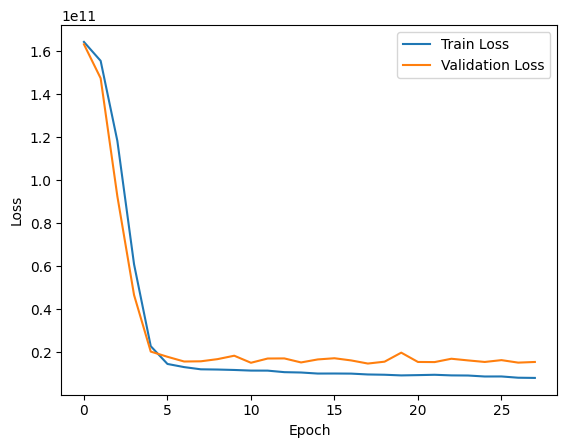

In [66]:
# second train
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
%load_ext tensorboard
%tensorboard --logdir logs_model/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16828), started 1 day, 19:15:10 ago. (Use '!kill 16828' to kill it.)

In [70]:
!kill 16828

'kill' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


# Analyse

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

In [71]:
premier_model.evaluate(X_test, Y_test)[1]

87/87 [==============================] - 3s 16ms/step - loss: 266354393088.0000 - mae: 205579.3438


205579.34375

In [72]:
premier_model.evaluate(X_test, Y_test)

87/87 [==============================] - 3s 19ms/step - loss: 266354393088.0000 - mae: 205579.3438


[266354393088.0, 205579.34375]

In [73]:
premier_model.evaluate(X_test, Y_test)[1]

87/87 [==============================] - 2s 16ms/step - loss: 266354393088.0000 - mae: 205579.3438


205579.34375

87/87 [==============================] - 3s 15ms/step


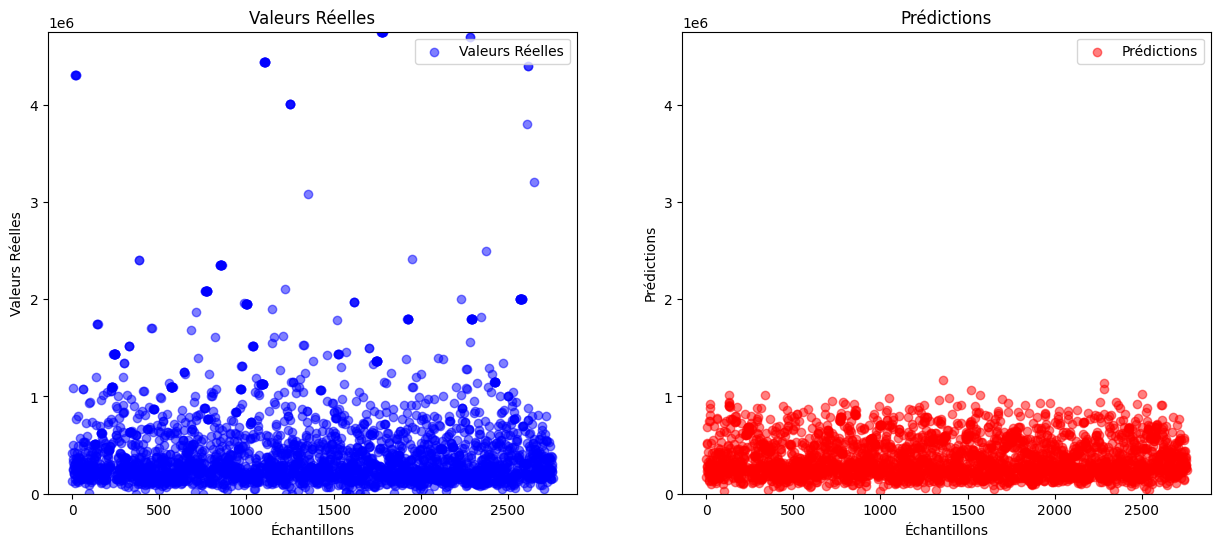

In [74]:
import matplotlib.pyplot as plt

# Prédiction sur l'ensemble de test
predictions = premier_model.predict(X_test)

# Déterminer les limites communes pour les deux graphiques
min_value = min(min(Y_test), min(predictions))
max_value = max(max(Y_test), max(predictions))

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot des valeurs réelles
ax1.scatter(range(len(Y_test)), Y_test, label='Valeurs Réelles', color='blue', alpha=0.5)
ax1.set_title('Valeurs Réelles')
ax1.set_xlabel('Échantillons')
ax1.set_ylabel('Valeurs Réelles')
ax1.legend()
ax1.set_ylim(min_value, max_value)  # Appliquer les limites communes

# Plot des prédictions
ax2.scatter(range(len(predictions)), predictions, label='Prédictions', color='red', alpha=0.5)
ax2.set_title('Prédictions')
ax2.set_xlabel('Échantillons')
ax2.set_ylabel('Prédictions')
ax2.legend()
ax2.set_ylim(min_value, max_value)  # Appliquer les limites communes

plt.show()
